In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [4]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
df = pd.read_csv('iris-dataset.csv', names=cols)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Analizando os Dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
label           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


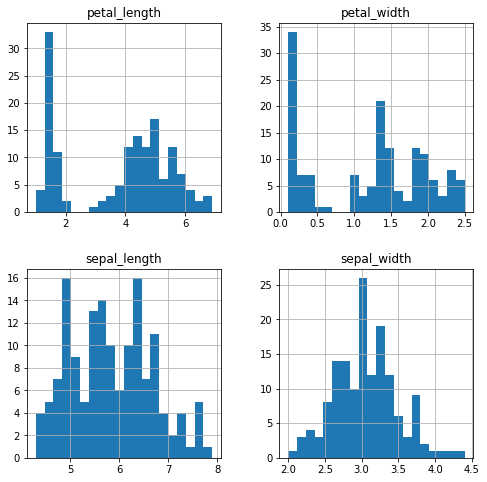

In [8]:
df.hist(bins=20, figsize=(8,8));

In [9]:
df.corr().style.set_precision(4)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.1094,0.8718,0.818
sepal_width,-0.1094,1,-0.4205,-0.3565
petal_length,0.8718,-0.4205,1,0.9628
petal_width,0.818,-0.3565,0.9628,1


In [10]:
df['label'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: label, dtype: int64

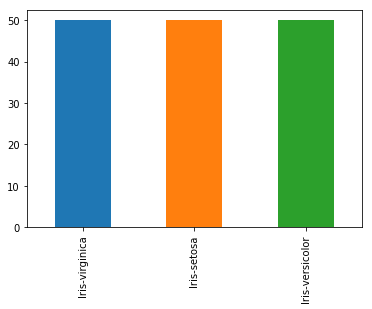

In [11]:
df['label'].value_counts().plot(kind='bar');

### Selecionando apenas as classes setosa e versicolor para a classificação binaria

In [12]:
df = df[ (df['label'] == 'Iris-setosa') | (df['label'] == 'Iris-versicolor') ]

In [13]:
df['label'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: label, dtype: int64

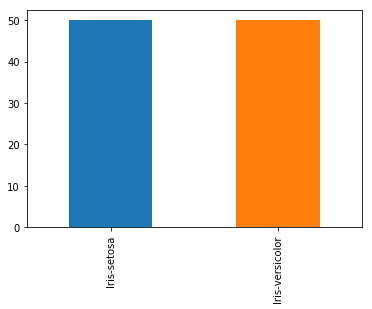

In [14]:
df['label'].value_counts().plot(kind='bar');

### Alterando as labels setosa e versicolor para 1 e -1, respectivamente

In [15]:
df['label'] = np.where(df['label'] == 'setosa', 1, -1)

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,-1
1,4.9,3.0,1.4,0.2,-1
2,4.7,3.2,1.3,0.2,-1
3,4.6,3.1,1.5,0.2,-1
4,5.0,3.6,1.4,0.2,-1


### Selecionando as features X e label y

In [17]:
X = df.values[:, :-1]
y = df.values[:, -1]

### Randomização dos dados usando semente (seed)

In [18]:
rs = np.random.RandomState(1)
shuffled_indices = rs.permutation(X.shape[0])
shuffled_indices

array([80, 84, 33, 81, 93, 17, 36, 82, 69, 65, 92, 39, 56, 52, 51, 32, 31,
       44, 78, 10,  2, 73, 97, 62, 19, 35, 94, 27, 46, 38, 67, 99, 54, 95,
       88, 40, 48, 59, 23, 34, 86, 53, 77, 15, 83, 41, 45, 91, 26, 98, 43,
       55, 24,  4, 58, 49, 21, 87,  3, 74, 30, 66, 70, 42, 47, 89,  8, 60,
        0, 90, 57, 22, 61, 63,  7, 96, 13, 68, 85, 14, 29, 28, 11, 18, 20,
       50, 25,  6, 71, 76,  1, 16, 64, 79,  5, 75,  9, 72, 12, 37])

In [19]:
X = X[shuffled_indices]
y = y[shuffled_indices]

In [20]:
X[:5]

array([[5.5, 2.4, 3.8, 1.1],
       [5.4, 3. , 4.5, 1.5],
       [5.5, 4.2, 1.4, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5. , 2.3, 3.3, 1. ]])

In [21]:
y[:5]

array([-1., -1., -1., -1., -1.])

In [22]:
n = int(np.count_nonzero(y) * 0.05)
X_train = X[:n]
y_train = y[:n]
X_test = X[n:]
y_test = y[n:]

In [23]:
np.average(X_train), np.average(y_train)

(3.135, -1.0)

In [24]:
np.average(X_test), np.average(y_test)

(3.0486842105263157, -1.0)

### Criação, treino e avaliação de modelos usando a métrica acurácia

### Perceptron

In [25]:
model = Perceptron(eta=0.01, n_iter=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

1.0

In [26]:
model.errors_

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

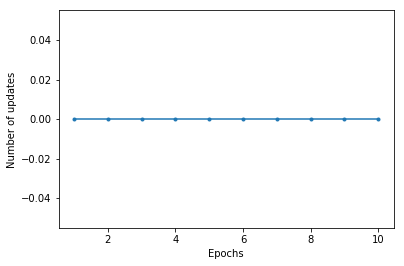

In [27]:
plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');

In [28]:
model = Perceptron(eta=0.0001, n_iter=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

1.0

In [29]:
model.errors_

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

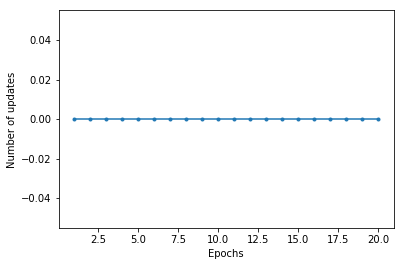

In [30]:
plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');

In [31]:
model = Perceptron(eta=0.000001, n_iter=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

1.0

In [32]:
model.errors_

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

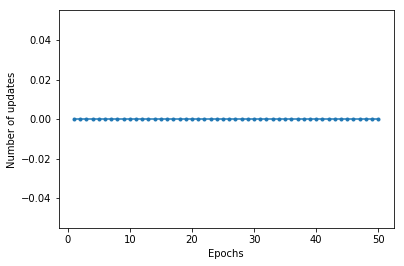

In [33]:
plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');

### AdalineGD

In [34]:
model = AdalineGD(eta=0.001, n_iter=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

1.0

In [35]:
model.cost_

[2.212352445755142,
 1.242366746791628,
 0.6995570027160906,
 0.395787331633114,
 0.22578038190090613,
 0.13062489709590142,
 0.07735522690131902,
 0.047524400535550695,
 0.030809830799172766,
 0.021435184777997066]

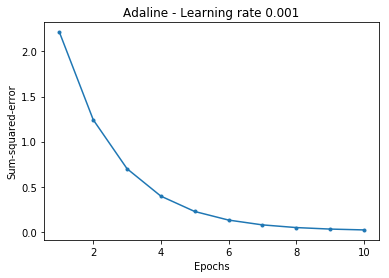

In [36]:
plt.plot(range(1, len(model.cost_)+1), model.cost_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error');
plt.title('Adaline - Learning rate 0.001');

In [37]:
model = AdalineGD(eta=0.0001, n_iter=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

1.0

In [38]:
model.cost_

[2.212352445755142,
 2.102772140501999,
 1.9986437187345045,
 1.899695923091429,
 1.8056709925854582,
 1.716323991092875,
 1.6314221692541528,
 1.5507443581230964,
 1.4740803929848962,
 1.4012305658420343,
 1.3320051051416866,
 1.2662236813892171,
 1.2037149373598117,
 1.144316041684366,
 1.0878722646466525,
 1.034236575086643,
 0.9832692573598527,
 0.9348375473548228,
 0.888815286620507,
 0.8450825937025013]

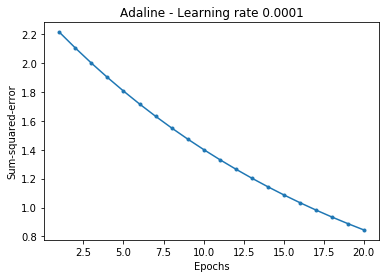

In [39]:
plt.plot(range(1, len(model.cost_)+1), model.cost_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error');
plt.title('Adaline - Learning rate 0.0001');

In [40]:
model = AdalineGD(eta=0.01, n_iter=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.0

In [41]:
model.cost_

[2.212352445755142,
 5.094230812911432,
 11.748769357977226,
 27.113618439336484,
 62.588973440569184,
 144.49592460621292,
 333.60532222563506,
 770.2265443659409,
 1778.3096527431228,
 4105.799241042834,
 9479.569843192432,
 21886.67568010755,
 50532.53442115835,
 116670.86115182657,
 269372.80300614936,
 621935.1399242568,
 1435940.5145442546,
 3315337.9443519376,
 7654541.110785334,
 17673009.701144602,
 40803918.54447955,
 94209180.94480431,
 217512682.39226225,
 502199111.8911232,
 1159490771.8147838,
 2677063376.0505843,
 6180875685.786051,
 14270571472.061676,
 32948277961.261772,
 76071867390.73715,
 175636766665.56256,
 405514875115.1894,
 936263614171.462,
 2161670530513.6116,
 4990922868049.482,
 11523176507800.598,
 26605018819259.2,
 61426380642002.11,
 141822874263285.16,
 327444453898790.0,
 756012532858627.1,
 1745502002046366.0,
 4030061813429770.0,
 9304714747404470.0,
 2.1482974837272908e+16,
 4.960046819142313e+16,
 1.1451889058399517e+17,
 2.6440428445102496e+17,


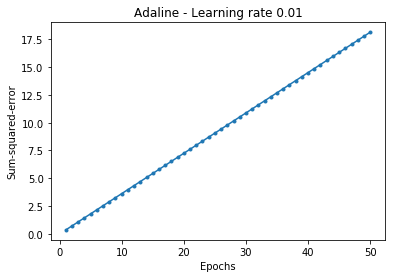

In [42]:
plt.plot(range(1, len(model.cost_)+1), np.log10(model.cost_), marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error');
plt.title('Adaline - Learning rate 0.01');

In [43]:
model = AdalineGD(eta=0.00001, n_iter=30)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

1.0

In [44]:
model.cost_

[2.212352445755142,
 2.2012685978762594,
 2.190240528023629,
 2.179267955488198,
 2.168350600973615,
 2.1574881865891204,
 2.1466804358424723,
 2.1359270736329083,
 2.125227826244143,
 2.114582421337399,
 2.103990587944478,
 2.093452056460858,
 2.082966558638835,
 2.072533827580692,
 2.062153597731907,
 2.0518256048743915,
 2.041549586119765,
 2.031325279902664,
 2.0211524259740834,
 2.011030765394751,
 2.0009600405285375,
 1.990939995035897,
 1.9809703738673425,
 1.9710509232569535,
 1.961181390715915,
 1.9513615250260932,
 1.941591076233638,
 1.9318697956426205,
 1.9221974358087048,
 1.9125737505328466]

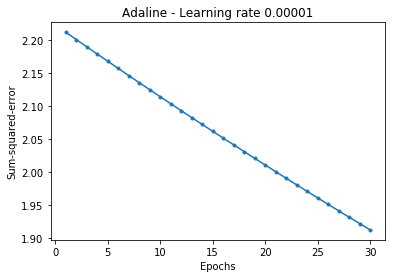

In [45]:
plt.plot(range(1, len(model.cost_)+1), model.cost_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error');
plt.title('Adaline - Learning rate 0.00001');

#### Para os valores escolhido para as features e labels nos metodos AdalineGD e Perceptron, o Perceptron mantem uma taxa de acuracia em 1, idependente dos valores para eta e n_iter escolhidos, ja o Adalina, posue uma acuracia 1 com um eta acima de 0.01. Podemos notar que o Perceptron permanece com uma contant em 0 nos seus erros e ja  Adaline não, mesmo com uma acuracia em 1.0 ela ainda possui erros variando de acordo com o eta escolhido.